In [1]:
from google.colab import files

In [2]:
files.upload()

Saving data.csv to data.csv


{'data.csv': b'Sentence,Sentiment\n"The GeoSolutions technology will leverage Benefon \'s GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .",positive\n"$ESI on lows, down $1.50 to $2.50 BK a real possibility",negative\n"For the last quarter of 2010 , Componenta \'s net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",positive\n"According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .",neutral\n"The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .",neutral\n$SPY wouldn\'t be surprised to see a green close,positive\nShell\'s $70 Billion BG Deal Meets Shareholder Skepticism,negative\n"SSH COMMUNICATIONS SECURITY CORP STOCK EXCH

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("data.csv")

In [5]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [6]:
df.shape

(5842, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [8]:
df.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [9]:
import seaborn as sns

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64


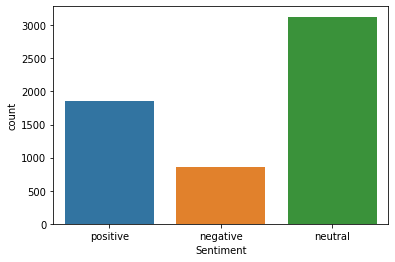

In [10]:
print(df["Sentiment"].value_counts())
sns.countplot(x="Sentiment",data=df);

In [11]:
target = []

for i in df["Sentiment"]:
    if i == "positive":
        target.append(1)
    elif i == "neutral":
        target.append(0)
    else:
        target.append(-1)
df["Target"] = target

In [12]:
df["Target"].value_counts()

 0    3130
 1    1852
-1     860
Name: Target, dtype: int64

In [13]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [14]:
from nltk.corpus import stopwords

In [15]:
stop_words = set(stopwords.words("english"))


In [16]:
df["Sentence"] = df["Sentence"].str.replace("\d","")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [17]:
import re
import string   
from wordcloud import WordCloud
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag, ne_chunk
from nltk.chunk import tree2conlltags

import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


import warnings
warnings.filterwarnings("ignore")

In [18]:
def cleaner(data):
    
    tokens = word_tokenize(str(data).replace("'", "").lower()) 
    
    without_punc = [w for w in tokens if w.isalpha()]
    
    without_sw = [t for t in without_punc if t not in stop_words]
    
    text_len = [WordNetLemmatizer().lemmatize(t) for t in without_sw]

    text_cleaned = [PorterStemmer().stem(w) for w in text_len]
    
    return " ".join(text_cleaned)


In [19]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [20]:
df["Sentence"] = df["Sentence"].apply(cleaner)
df["Sentence"].head()

0    geosolut technolog leverag benefon gp solut pr...
1                              esi low bk real possibl
2    last quarter componenta net sale doubl eurm eu...
3    accord chamber commerc major construct compani...
4    swedish buyout firm sold remain percent stake ...
Name: Sentence, dtype: object

In [21]:
rare_words = pd.Series(" ".join(df["Sentence"]).split()).value_counts()
rare_words

eur         1625
compani      916
mn           813
oper         633
sale         607
            ... 
vivu           1
balfour        1
jarvinen       1
compress       1
divi           1
Length: 7271, dtype: int64

In [22]:
rare_words = rare_words[rare_words <= 2]

In [23]:
df["Sentence"] = df["Sentence"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))

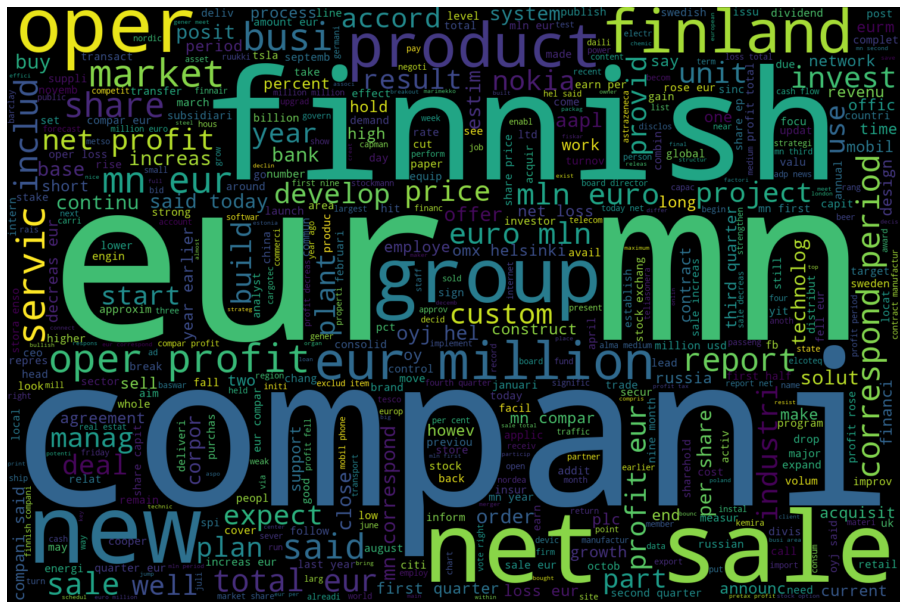

In [24]:
plt.figure(figsize=(16,12))
wordcloud = WordCloud(background_color="black",max_words=500, width=1500, height=1000).generate(' '.join(df['Sentence']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
"ISLAM SAIFUL 201950612"

'ISLAM SAIFUL 201950612'